<a href="https://colab.research.google.com/github/gasoares23/IC/blob/main/ProblemaG2GA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-opt

Melhor solução encontrada:  [9.99733563 9.76786386 9.95621361 9.82912022 9.7774995  8.34095192
 7.94347107 9.9187699 ]
Valor da função objetivo:  [2018.31689609]


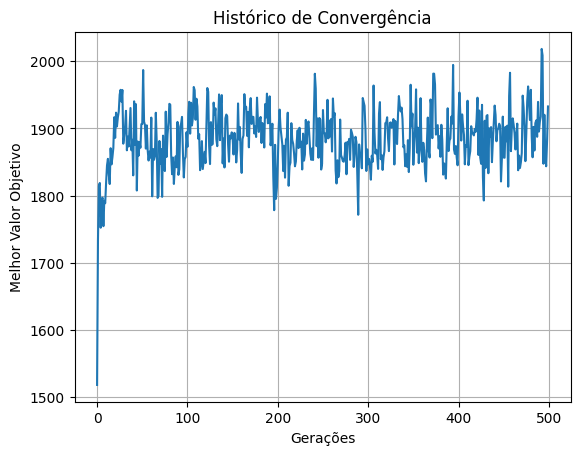

In [2]:
import numpy as np
from sko.GA import GA
import matplotlib.pyplot as plt

def objetivo(x):
    return 5 * x[0] + 5 * x[1] + 5 * x[2] + 5 * x[3] - 5 * (x[0]**2 + x[1]**2 + x[2]**2 + x[3]**2) - 7 * x[4] - 4 * x[5] - 10 * x[6] - 8 * x[7]

def penalty(x):
    g1 = 127 - 2 * x[0]**2 - 3 * x[1]**4 - x[2] - 4 * x[3]**2 - 5 * x[4]
    g2 = 282 - 7 * x[0] - 3 * x[1] - 10 * x[2]**2 - x[3] + x[4]
    g3 = 196 - 23 * x[0] - 6 * x[1]**2 - 8 * x[2] - 2 * x[3]**2 - 5 * x[5]**2
    g4 = 4 - 3 * x[0] - 2 * x[1]**2 - 5 * x[2] + 11 * x[3]

    penalty_sum = 0
    for g in [g1, g2, g3, g4]:
        penalty_sum += max(0, g)**2

    return penalty_sum

def funcao_otimizacao(x):
    return objetivo(x) + penalty(x)

# Definindo os limites corretamente
lb = [1, 1, 1, 1, 1, 1, 1, 1]  # Limites inferiores
ub = [10, 10, 10, 10, 10, 10, 10, 10]  # Limites superiores

# Configurando o GA
ga = GA(func=funcao_otimizacao, n_dim=8, size_pop=200, max_iter=500, lb=lb, ub=ub, prob_mut=0.1)

# Executando o GA
best_x, best_y = ga.run()

# Exibindo os resultados
print('Melhor solução encontrada: ', best_x)
print('Valor da função objetivo: ', -1 * best_y)

# Plotando o histórico de convergência
plt.plot(-1 * np.array(ga.generation_best_Y))
plt.xlabel('Gerações')
plt.ylabel('Melhor Valor Objetivo')
plt.title('Histórico de Convergência')
plt.grid(True)
plt.show()
